# **Challenge Project 0 1 - Boston Houses**

*18 de março, 2020*

## **1. Descrição geral do problema**

---

Este conjunto de dados contém informações coletadas pelo Serviço de Censo dos EUA sobre moradias na área de  Massachusetts Mass. Foi obtido no arquivo [StatLib](http://lib.stat.cmu.edu/datasets/boston) e tem sido amplamente utilizado em todo o país na literatura para comparar algoritmos. O [conjunto de dados](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) é pequeno, com apenas 506 registros.

**Objetivo:** prever os preços de casas em Boston a partir das informações fornecidas pelo conjunto de dados. Iremos avaliar os modelos preditivos a serem desenvolvidos a partir da métrica *R-squared* (**R2**).

---

## **2. Carregando dados**

### **2.1 Importando bibliotecas necessárias**


Vamos começar nosso projeto importanto todas as bilbiotecas necessárias para a realização das fases iniciais de exploração e transformação dos dados (*Data Munging*).

In [ ]:
# Definindo a ocultação de warnings.

options(warn = -1)

# Caso não possua uma das bibliotecas importadas abaixo, a instale com um dos comandos a seguir:

install.packages(c(
    'MASS',
    'ggplot2',
    'ggthemes',
    'GGally',
    'corrplot',
    'dplyr',
    'caret',
    'e1071'
))

In [ ]:
# Importando bibliotecas.

library(MASS)
library(ggplot2)
library(ggthemes)
library(GGally)
library(corrplot)
library(dplyr)
library(caret)
library(e1071)

### **2.2 Carregando dados**

Nosso dataset é carregado junto com a biblioteca **MASS** e é dela que faremos a importação dos dados.

In [3]:
# Importando os dados do dataset Boston incluso na biblioteca MASS.

data <- Boston

# Visualizando as primeiras linhas do dataset.

head(data)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


## **3. Análise exploratória dos dados**

Nesta etapa vamos buscar entender a disposição e as características dos dados dentro do dataset além de extrair insigths que possam auxiliar no processo de criação do modelo preditivo.

Segundo a [documentação](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) referente ao projeto, cada linha dos dados contém um registro, com as seguintes variáveis:

| Variável         | Descrição                                                                                    |
|:-----------------|:---------------------------------------------------------------------------------------------|
| **crim**         | é a taxa de criminalidade per capita por cidade;                                             |
| **zn**           | é a proporção de terrenos residenciais divididos por lotes acima de 25.000 pés quadrados;    |
| **indus**        | é a proporção de acres não comerciais por cidade;                                            |
| **chas**         | indica se a casa limita ou não o Rio Charles (1 se o trecho limita o rio; 0 caso contrário); |
| **nox**          | é a concentração de óxidos nítricos (partes por 10 milhões);                                 |
| **rm**           | é o número médio de quartos por habitação;                                                   |
| **age**          | é a proporção de unidades ocupadas pelos proprietários construídas antes de 1940;            |
| **dis**          | é a distância ponderada de cinco centros de emprego em Boston;                               |
| **rad**          | é o índice de acessibilidade às rodovias radiais;                                            |
| **tax**          | é a taxa de imposto sobre a propriedade de valor total por US 10.000;                        |
| **ptratio**      | é a proporção aluno-professor por cidade;                                                    |
| **black**        | é definida por 1000 (Bk - 0,63) ^ 2 onde Bk é a proporção de negros por cidade;              |
| **lstat**        | é a menor porcentagem do status da população e;                                              |
| **medv (Target)**| é o valor médio das casas ocupadas pelos proprietários em US 1.000.                          |



### **3.1 Visão geral dos dados**

In [4]:
# Verificando os tipos das colunas carregadas do dataset.

glimpse(data)

Observations: 506
Variables: 14
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.088...
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5...
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87,...
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.5...
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.6...
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9...
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9...
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4,...
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311,...
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2,...
$ black   <dbl> 396.90, 396.90, 392.83, 394.63, 396.90, 394.12, 395.60, 396...
$ lstat   <dbl> 4.98

Verificamos a existência de 14 variáveis numéricas e 506 observações dentro do dataset.

In [5]:
# Verificando a existência de valores NA no dataset.

print(sapply(data, function(v) {
    anyNA(v)
}))

   crim      zn   indus    chas     nox      rm     age     dis     rad     tax 
  FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE 
ptratio   black   lstat    medv 
  FALSE   FALSE   FALSE   FALSE 


Não foi detectado nenhum valor *NA* dentro do conjunto de dados.

In [6]:
# Verificando o número de valores únicos presentes em cada uma das variáveis especificadas.

print(sapply(data, function(v) {
    length(unique(v))
}))

   crim      zn   indus    chas     nox      rm     age     dis     rad     tax 
    504      26      76       2      81     446     356     412       9      66 
ptratio   black   lstat    medv 
     46     357     455     229 


Note que as variáveis **chas** e **rad** são as que apresentam as menores quantidades de valores únicos. Isso nos indica que ambas podem estar representando categorias de classes em cada variável.

Podemos confirmar esta teoria para a variável **chas** a partir da documentação do dataset que a classifica como uma variável categórica. E caso seja necessário, também podemos tratar a variável **rad** da mesma forma.

Agora vamos calcular algumas estatísticas para cada uma das variáveis quantitativas, isto é, iremos desconsiderar a variável qualitativa **chas** nas etapas a seguir.

In [7]:
# Definindo as variáveis quantitativas dentro do dataset.

numVars <- colnames(data) != 'chas'

# Verificando estatísticas das variáveis do dataset que representam variáveis quantitativas.

stats <- do.call(cbind, lapply(data[, numVars], summary))

# Determinando o valor do desvio-padrão de cada variável.

dataSD <- sapply(data[, numVars], sd)

# Inserindo os desvios-padrão no dataset.

stats <- as.data.frame(rbind(stats, sd = dataSD))

# Determinando o valor do coeficiente de variação de cada variável.

dataCV <- sapply(data[, numVars], function(c){
    sd(c) / mean(c) * 100
})

# Inserindo os coeficiente de variação no dataset.

stats <- as.data.frame(rbind(stats, CV = dataCV))

# Alterando nome das linhas.

rownames(stats) <- c('Min', 'Q1', 'Median', 'Mean', 'Q3', 'Max', 'Sd', 'CV')

# Exibindo o dataset.

stats

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Min,0.006320,0.00000,0.460000,0.3850000,3.5610000,2.90000,1.129600,1.000000,187.00000,12.600000,0.32000,1.730000,5.000000
Q1,0.082045,0.00000,5.190000,0.4490000,5.8855000,45.02500,2.100175,4.000000,279.00000,17.400000,375.37750,6.950000,17.025000
Median,0.256510,0.00000,9.690000,0.5380000,6.2085000,77.50000,3.207450,5.000000,330.00000,19.050000,391.44000,11.360000,21.200000
Mean,3.613524,11.36364,11.136779,0.5546951,6.2846344,68.57490,3.795043,9.549407,408.23715,18.455534,356.67403,12.653063,22.532806
Q3,3.677083,12.50000,18.100000,0.6240000,6.6235000,94.07500,5.188425,24.000000,666.00000,20.200000,396.22500,16.955000,25.000000
Max,88.976200,100.00000,27.740000,0.8710000,8.7800000,100.00000,12.126500,24.000000,711.00000,22.000000,396.90000,37.970000,50.000000
Sd,8.601545,23.32245,6.860353,0.1158777,0.7026171,28.14886,2.105710,8.707259,168.53712,2.164946,91.29486,7.141062,9.197104
CV,238.037610,205.23759,61.600874,20.8903385,11.1799207,41.04834,55.485809,91.181152,41.28412,11.730604,25.59616,56.437413,40.816505


As variáveis que apresentam média, moda e mediana iguais são classificadas como tendo uma distribuição normal. No dataset que estamos manipulando não há nenhuma variável com está característica, mas podemos verificar se existe alguma que possua uma distribuição aproximadamente normal.

In [8]:
# Calculando a diferença entre o valor médio e mediano de cada variável.

d <- sapply(stats[c('Median', 'Mean'), ], diff)

# Ordenando em ordem decrescente a diferença entre o valor médio e mediano de cada variável.

print(d[order(d, decreasing = T)])

         tax           zn          rad         crim        indus         medv 
 78.23715415  11.36363636   4.54940711   3.35701356   1.44677866   1.33280632 
       lstat          dis           rm          nox      ptratio          age 
  1.29306324   0.58759269   0.07613439   0.01669506  -0.59446640  -8.92509881 
       black 
-34.76596838 


Podemos observar que as variáveis **rm** e **nox** são as que apresentam as menores diferenças absolutas entre seus valores médio e mediano no dataset, ou seja, são as que mais se aproximam de uma distribuição normal.

O coeficiente de variação das variáveis será a próxima estatística que vamos analisar.

In [9]:
# Transpondo o dataset com as estatísticas das variáveis.

statsT <- as.data.frame(t(stats))

# Ordenando em ordem crescente as linhas do dataframe a partir dos valores da variável CV.

statsT[order(statsT$CV), ]

,Min,Q1,Median,Mean,Q3,Max,Sd,CV
rm,3.56100,5.885500,6.20850,6.2846344,6.623500,8.7800,0.7026171,11.17992
ptratio,12.60000,17.400000,19.05000,18.4555336,20.200000,22.0000,2.1649455,11.73060
nox,0.38500,0.449000,0.53800,0.5546951,0.624000,0.8710,0.1158777,20.89034
black,0.32000,375.377500,391.44000,356.6740316,396.225000,396.9000,91.2948644,25.59616
medv,5.00000,17.025000,21.20000,22.5328063,25.000000,50.0000,9.1971041,40.81651
age,2.90000,45.025000,77.50000,68.5749012,94.075000,100.0000,28.1488614,41.04834
tax,187.00000,279.000000,330.00000,408.2371542,666.000000,711.0000,168.5371161,41.28412
dis,1.12960,2.100175,3.20745,3.7950427,5.188425,12.1265,2.1057101,55.48581
lstat,1.73000,6.950000,11.36000,12.6530632,16.955000,37.9700,7.1410615,56.43741
indus,0.46000,5.190000,9.69000,11.1367787,18.100000,27.7400,6.8603529,61.60087


As variáveis **rm** e **ptratio** são as que apresentam os menores coeficientes de variação, ou seja, seus conjuntos de dados são os mais homogêneos. Isto nos indica que: 

* **rm**: O número de quartos varia muito pouco e;
* **ptratio**: a proporção aluno-professor por cidade varia muito pouco.

As variáveis  **zn** e **crim** são as que apresentam os maiores coeficientes de variação, ou seja, seus conjuntos de dados são os mais heterogêneos. Isto nos indica que:

* **zn**: a proporção de terrenos residenciais divididos por lotes acima de 25.000 pés quadrados varia muito e;
* **crim**: a taxa de criminalidade per capita por cidade varia muito.

### **3.2 Analisando a correlação entre as variáveis**

Nesta etapa desejamos verificar como as variáveis se correlacionam, ou seja, como uma variável ajuda a prever o valor de outra variável no dataset.

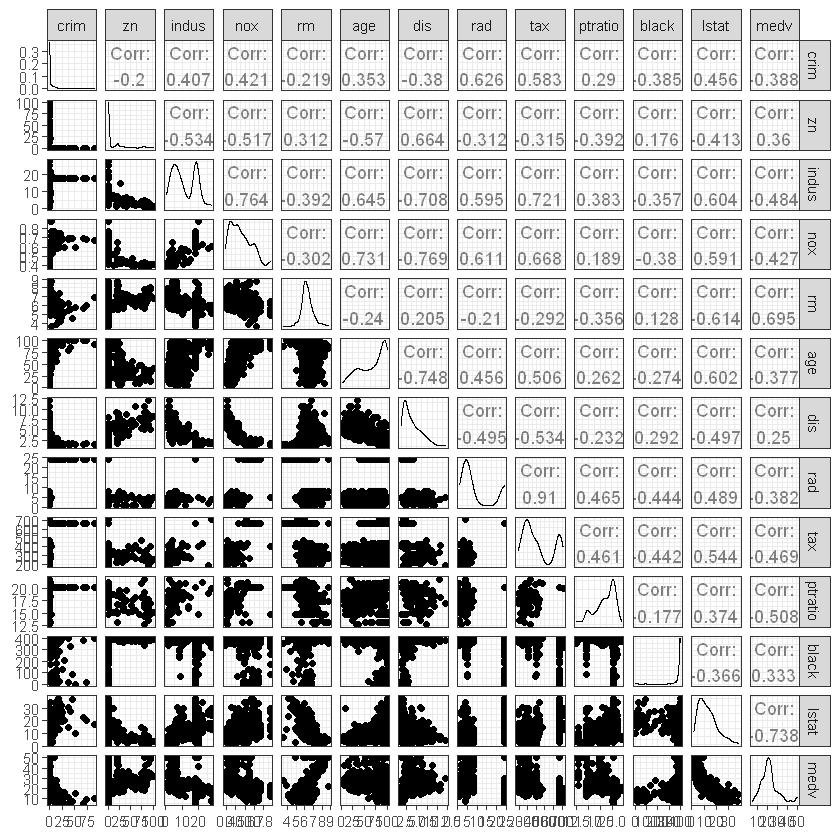

In [10]:
# Criando um pair plot para visualizar as correlações entre as variáveis númericas. 

ggpairs(data[, numVars]) + theme_bw()

Algo interessante de se notar neste gráfico é a distribuição da variável **indus** que aparenta possuir 2 modas. Isso pode estar indicando a presença de dois subconjuntos de dados dentro da variável.

Bom, vamos investigar mais detalhadamente a força e a direção dessas correlações.

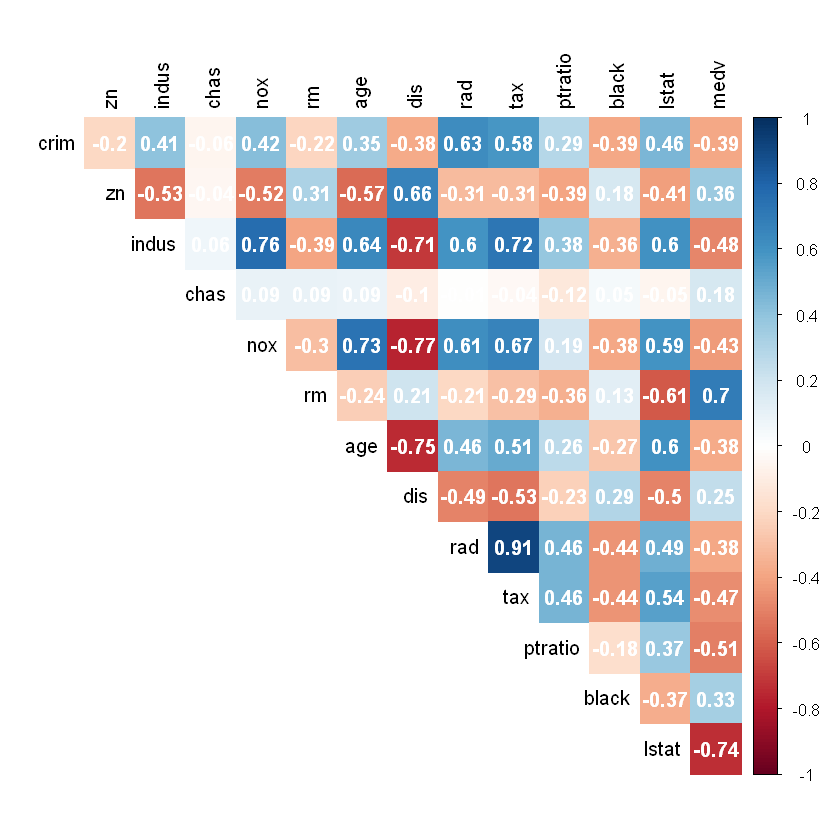

In [11]:
# Verificando a correlação entre as variáveis do dataset.

corrplot(cor(data),
         method      = 'color', 
         addCoef.col = 'white', 
         type        = 'upper', 
         tl.col      = 'black',
         diag        = F
)

Vemos que a variável alvo **medv** possui uma correlação moderada ou forte com todas as demais variáveis preditoras exceto com **chas**.

A variável **chas** apresenta um correlação fraca com todas as demais variáveis.

Existem correlações muito fortes entre as variáveis preditoras com as quais deveremos ter atenção para evitar problemas de *overfitting*.

### **3.3 Explorando a distribuição de cada variável individualmente**

#### **3.3.1 Criando funções auxiliares**

In [12]:
# Definindo uma função pra criar gráficos de densidade.

densityPlot <- function(col, data) {

  ggplot() +
    geom_density(aes(data[, col]), fill = "#C3D7A4") +
    labs(title = paste('Density plot for variable:', col)) +
    xlab(col) +
    theme_bw() 
}

In [13]:
# Definindo uma função pra criar gráficos de boxplot.

boxPlot <- function(col, data) {

    ggplot() +
        geom_boxplot(aes(y = data[, col]), fill = "#B9314F") +
        labs(title = paste('Box plot for variable:', col)) +
        xlab(col) +
        theme_bw() + 
        theme(axis.text.x = element_blank()) +
        ylab('')
}

In [14]:
# Definindo uma função pra criar gráficos de barras.

barPlot <- function(col, data) {

    ggplot() +
        geom_bar(aes(x = data[, col]), fill = "#FF934F") +
        labs(title = paste('Bar plot for variable:', col)) +
        xlab(col) +
        theme_bw()
}

#### **3.3.2 Variável crim**

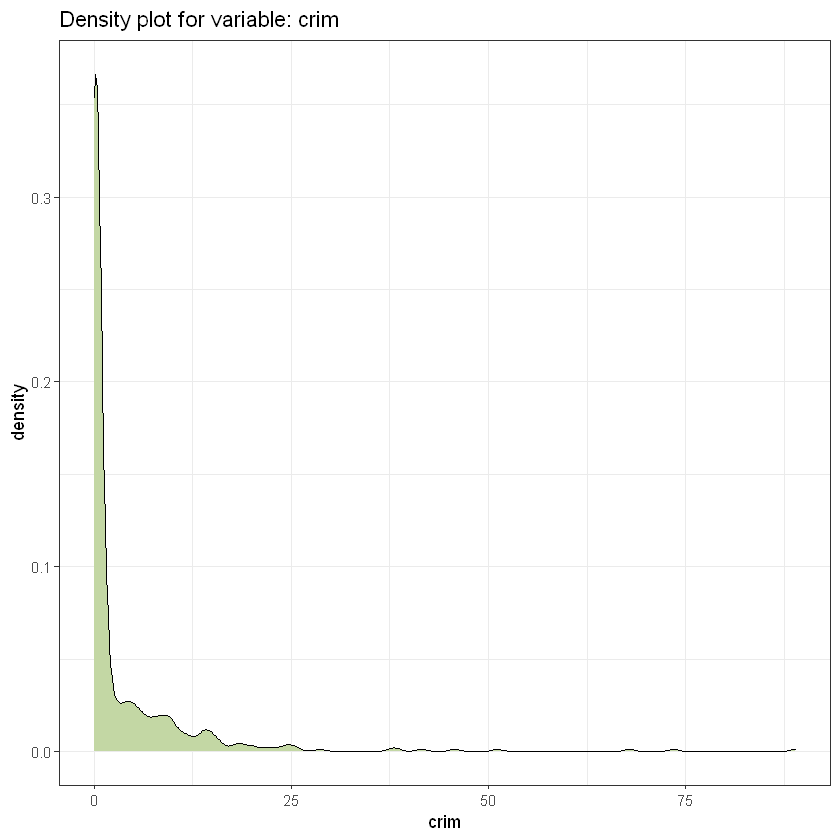

In [15]:
# Definindo o nome da variável a ser analisada.

col <- 'crim'

# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data = data)

O gráfico nos demonstra que a taxa de criminalidade per capita por cidade está mais densamente concentrada no valor 0.

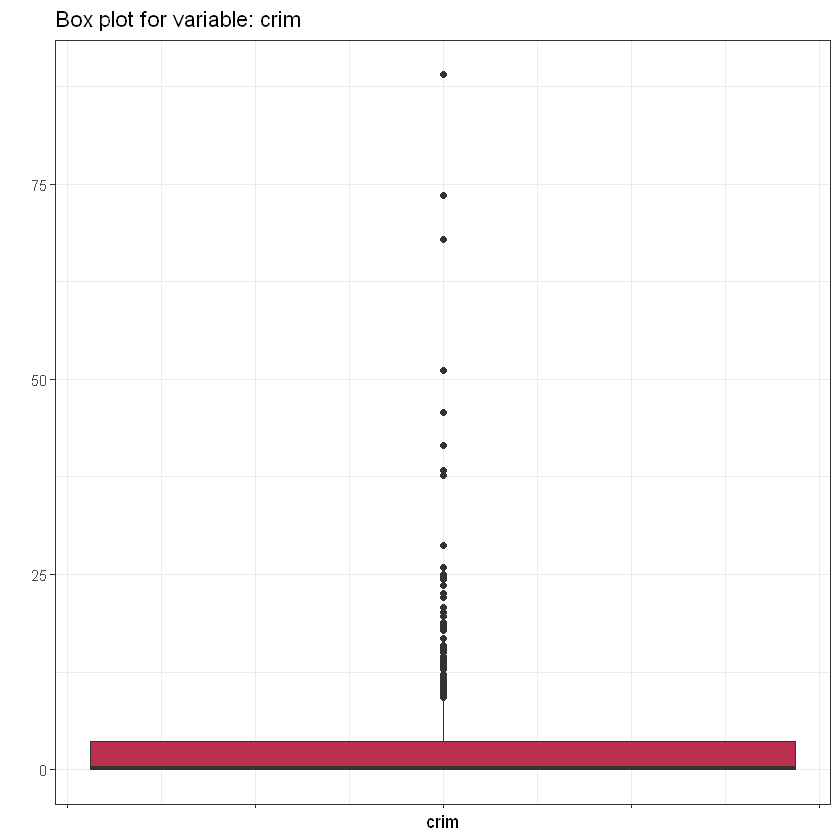

In [16]:
# Criando um boxplot para a variável especificada.

boxPlot(col, data = data)

O boxplot nos indica que há registros de casas com uma taxa de criminalidade per capita por cidade alta e discrepante dentro do conjunto de dados.

#### **3.3.3 Variável zn**

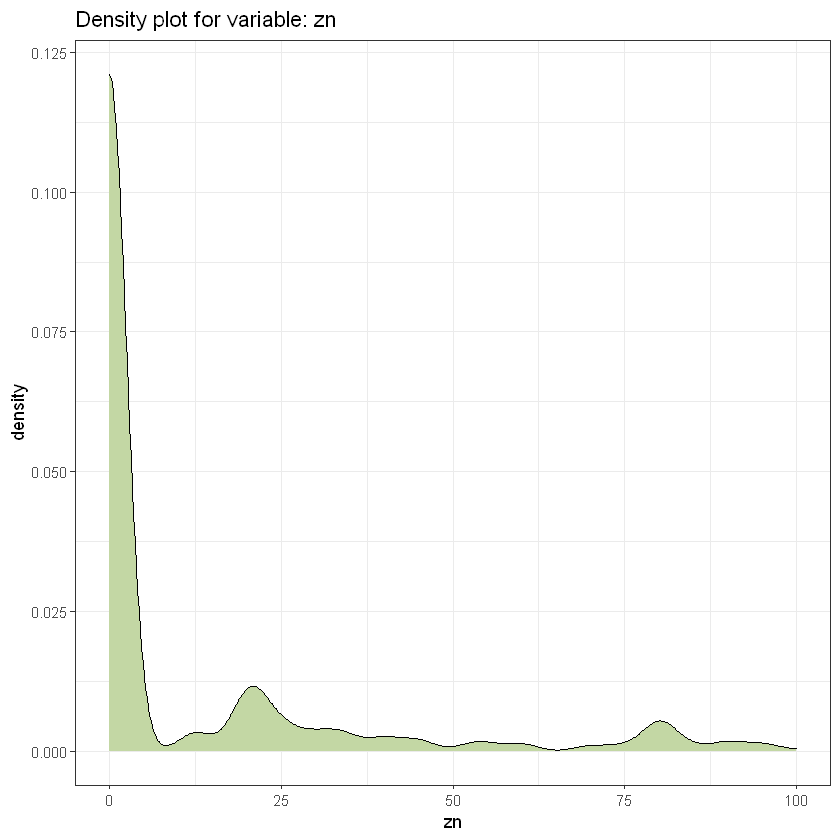

In [17]:
# Definindo o nome da variável a ser analisada.

col <- 'zn'

# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data = data)

O gráfico nos demonstra que a proporção de terrenos residenciais está mais densamente concentrada no valor 0.

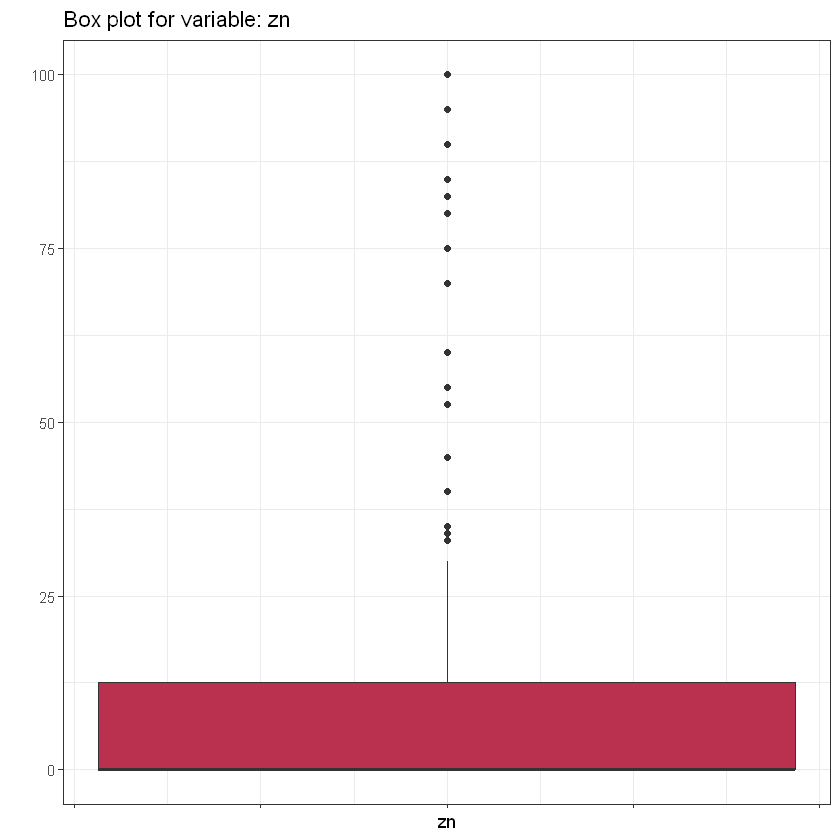

In [18]:
# Criando um boxplot para a variável especificada.

boxPlot(col, data = data)

O boxplot nos indica que há registros de casas com proporção de terrenos residenciais alta e discrepante dentro do conjunto de dados.

#### **3.3.4 Variável indus**

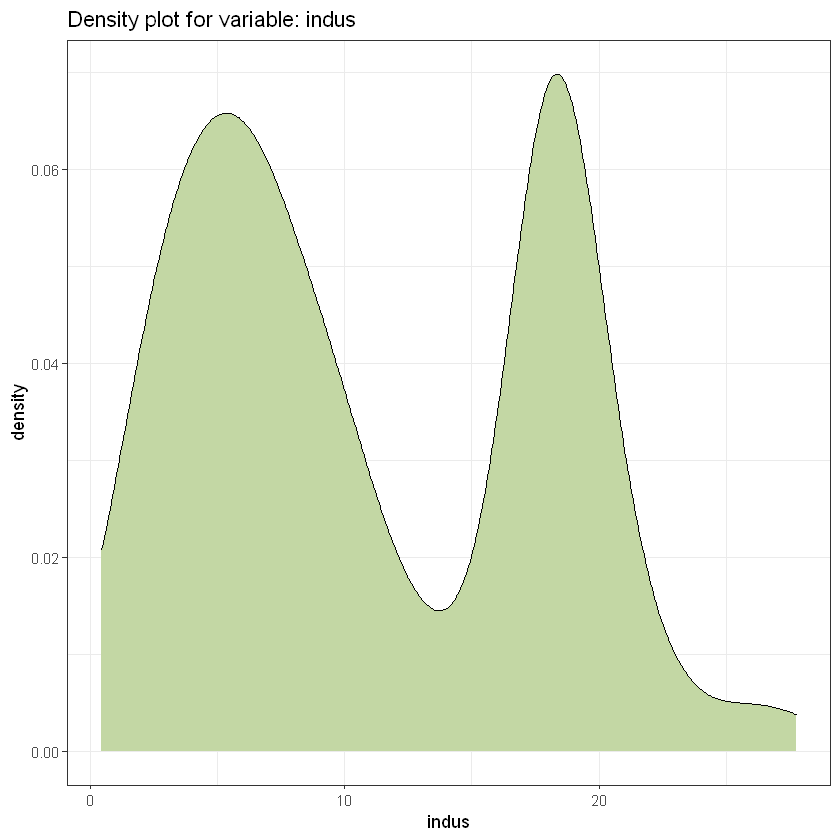

In [19]:
# Definindo o nome da variável a ser analisada.

col <- 'indus'

# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data = data)

O gráfico nos demonstra que a proporção de acres não comerciais por cidade possui duas modas. Talvez, uma possível explicação para isso possa ser que o dataset possui conjunto de dados de regiões urbanas e rurais.

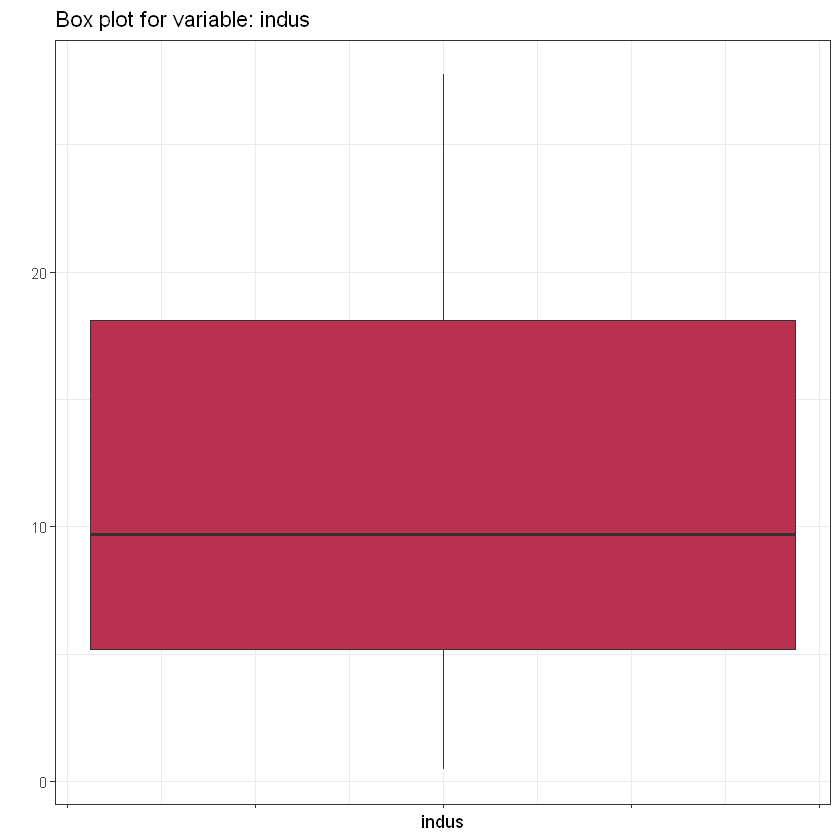

In [20]:
# Criando um boxplot para a variável especificada.

boxPlot(col, data = data)

O boxplot nos indica que o conjunto de dados de proporções de acres não comerciais por cidade apresenta uma assimetria à direita.

#### **3.3.5 Variável chas**

A variável chas é categórica, por isso vamos convertê-la para o tipo factor.

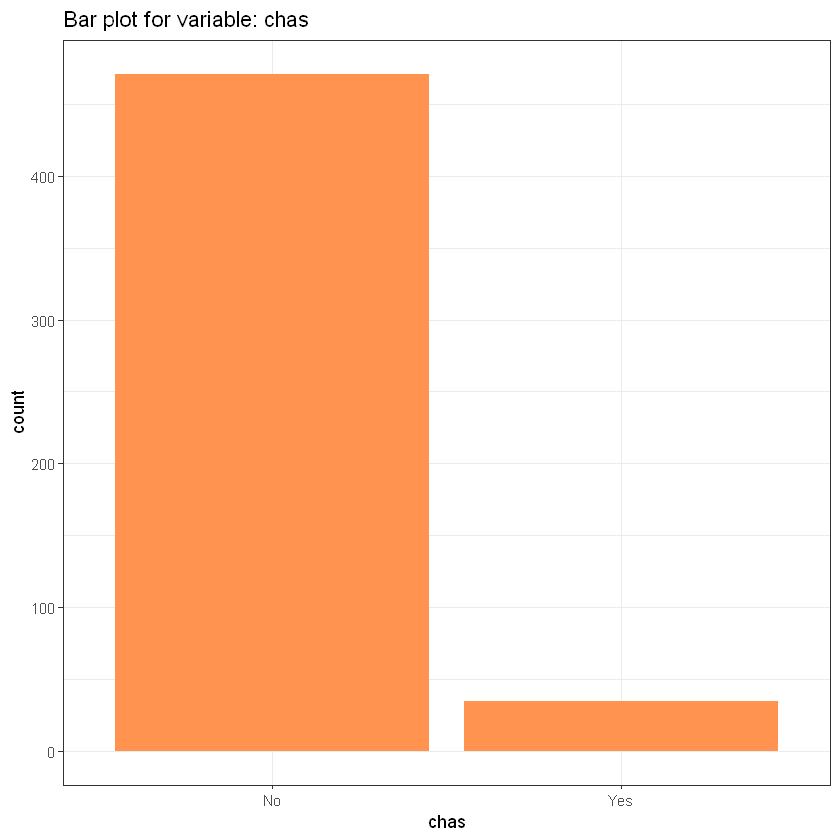

In [21]:
# Definindo o nome da variável a ser analisada.

col <- 'chas'

# Criando uma cópia do conjunto de dados.

dt <- data

# Convertendo variável para o tipo factor.

dt$chas <- factor(dt$chas, labels = c('No', 'Yes'))

# Criando um gráfico de densidade para a variável especificada.

barPlot(col, data = dt)

Há um desbalançeamento entre as classes deste conjunto de dados. Vamos mensurar numericamente esta desproporção.

In [22]:
# Determinando a proporção de registros para cada classe.

prop.table(table(chas = dt$chas))

# Eliminando cópia do dataset.

rm(dt)

chas
        No        Yes 
0.93083004 0.06916996 

Concluímos que aproximadamente 93% dos registros indica casas que não limitam o rio Charles enquanto apenas 7% o limita.

#### **3.3.6 Variável nox**

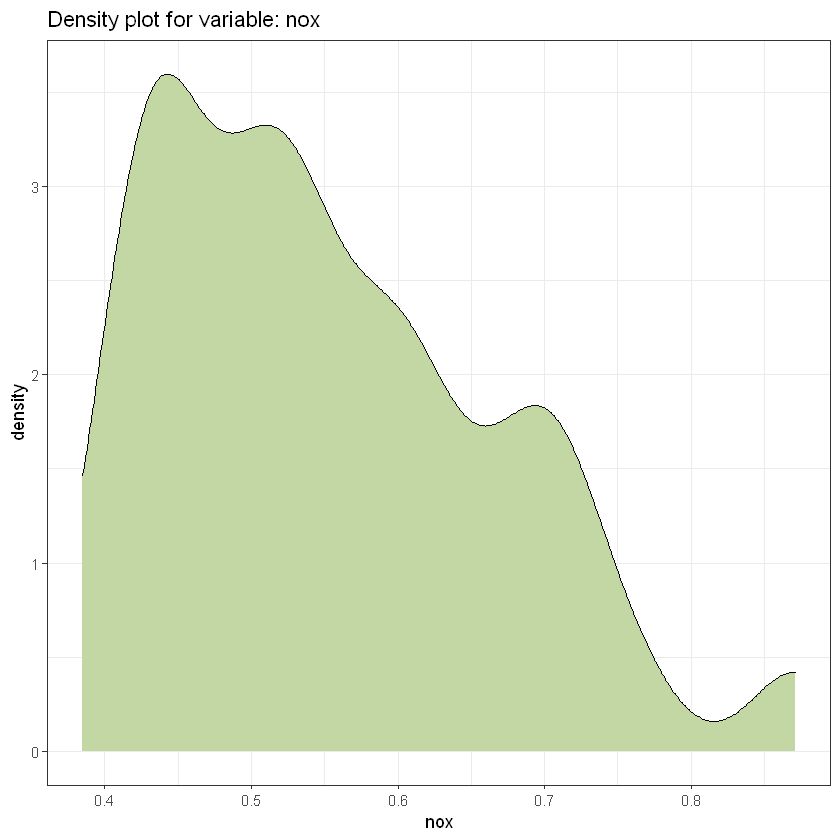

In [23]:
# Definindo o nome da variável a ser analisada.

col <- 'nox'

# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data = data)

O gráfico nos demonstra a densidade da concentração de óxidos nítricos nos registros do conjunto de dados. Parece haver uma assimetria à direita. 

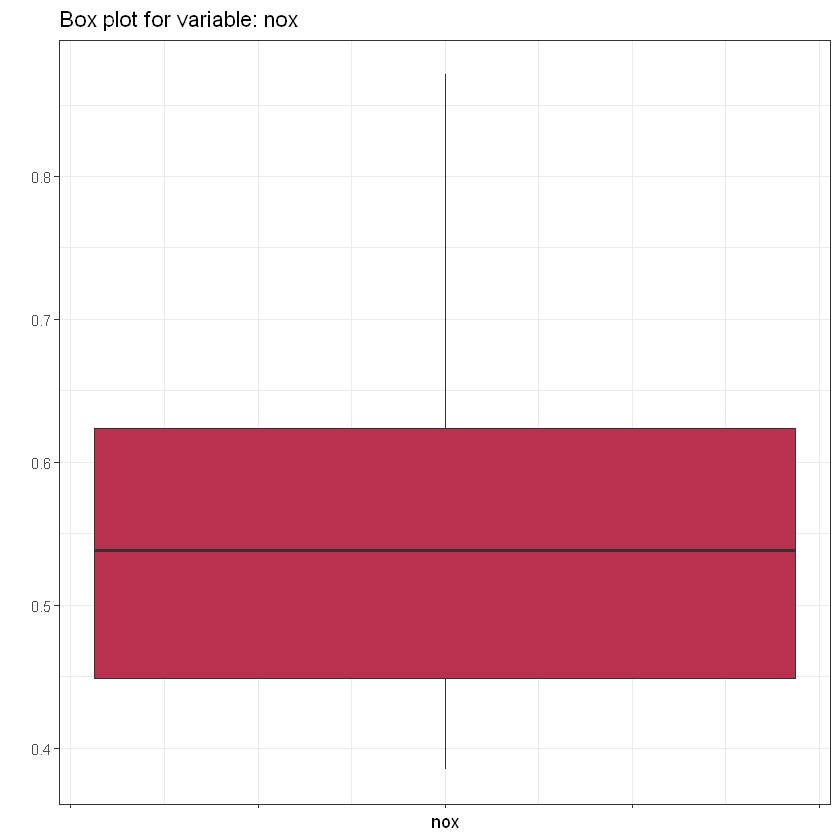

In [24]:
# Criando um boxplot para a variável especificada.

boxPlot(col, data = data)

O boxplot parece indicar que os dados entre o primeiro e o terceiro quartil estão igualmente distribuidos, mas a calda superior do boxplot é muito maior que a inferior.

Para este caso, vamos calcular o coeficiente de **Assimetria** e **Curtose**.

In [25]:
# Determinando o coeficiente de assimetria para o conjunto de dados nox.

sk <- skewness(data$nox)

# Imprimindo o valor do índice.

paste('SK:', sk)

[1] "SK: 0.724989659436866"

Para interpretar o resultado obtido, vamos olhar a tabela a seguir:

| Índice de Assimetria | Descrição                                                                                                                        |
|:---------------------|:---------------------------------------------------------------------------------------------------------------------------------|
| **SK ≈ 0**           | Os dados são simétricos. Tanto a cauda do lado direito quanto a do lado esquerdo da função densidade de probabilidade são iguais;|
| **SK < 0**           | A assimetria é negativa. A cauda do lado esquerdo da função densidade de probabilidade é maior que a do lado direito e;          |
| **SK > 0**           | A assimetria é positiva. A cauda do lado direito da função densidade de probabilidade é maior que a do lado esquerdo.            |

Como o índice de assimetria da variável **nox** foi maior que 0, podemos afirmar que este conjunto de dados possui uma assimetria positiva.

In [26]:
# Determinando o coeficiente de curtose para o conjunto de dados nox.

ck <- kurtosis(data$nox)

# Imprimindo o valor do índice.

paste('CK:', ck)

[1] "CK: -0.0874106432551769"

O coeficiente de *curtose* é uma medida que caracteriza o **achatamento da curva** da função de distribuição.

Para interpretar o resultado obtido, vamos olhar a tabela a seguir:

| Índice de Curtose | Descrição                                                                                                      |
|:------------------|:---------------------------------------------------------------------------------------------------------------|
| **CK ≈ 0**        | A distribuição é normal e é chamada de Curtose *Mesocúrtica*;                                                  |
| **CK < 0**        | A Cauda é mais leve que a normal. Para um coeficiente de Curtose negativo, tem-se uma Curtose *Platicúrtica* e;|
| **CK > 0**        | A Cauda é mais pesada que a normal. Para um coeficiente de Curtose positivo, tem-se uma Curtose *Leptocúrtica*.|

Como o índice de Curtose da variável **nox** é aproximadamente igual a 0, podemos afirmar que este conjunto de dados possui uma distribuição normal sendo classificada com curtose *mesocúrtica*.

**Atenção:** Há diferentes fórmulas para calcular estes coeficientes. Mas, para este estudo utilizamos as funções fornecidas pela biblioteca **e1071** com suas respectivas configurações padrão. Em caso de dúvida, consulte a [documentação](https://cran.r-project.org/web/packages/e1071/e1071.pdf).

#### **3.3.7 Variável rm**

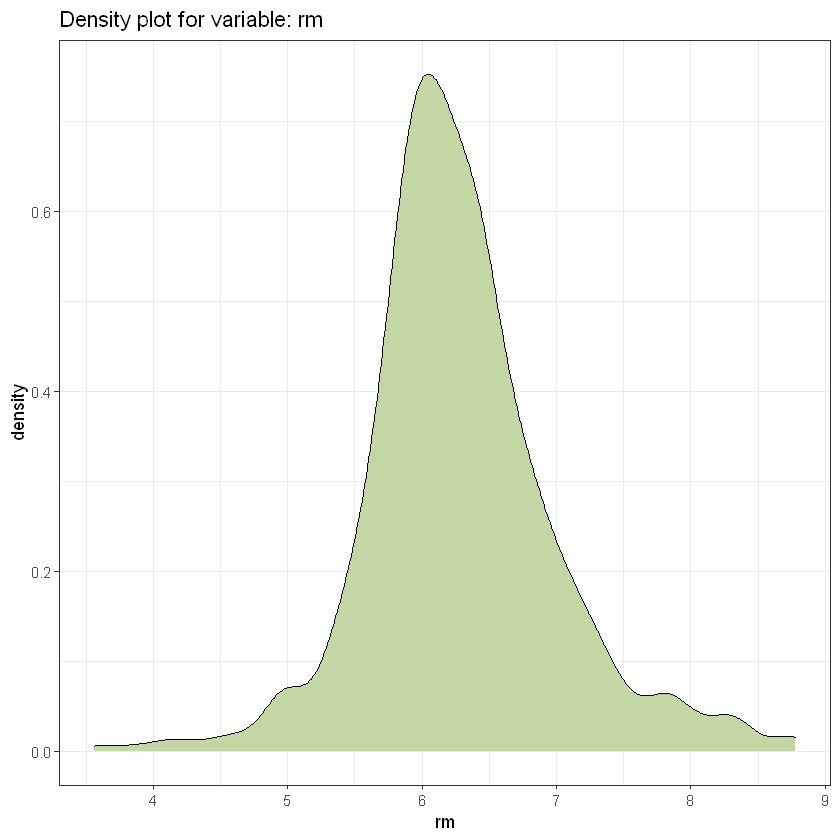

In [27]:
# Definindo o nome da variável a ser analisada.

col <- 'rm'

# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data = data)

O gráfico nos demonstra que o número médio de quartos por habitação aparenta possuir uma distribuição normal.

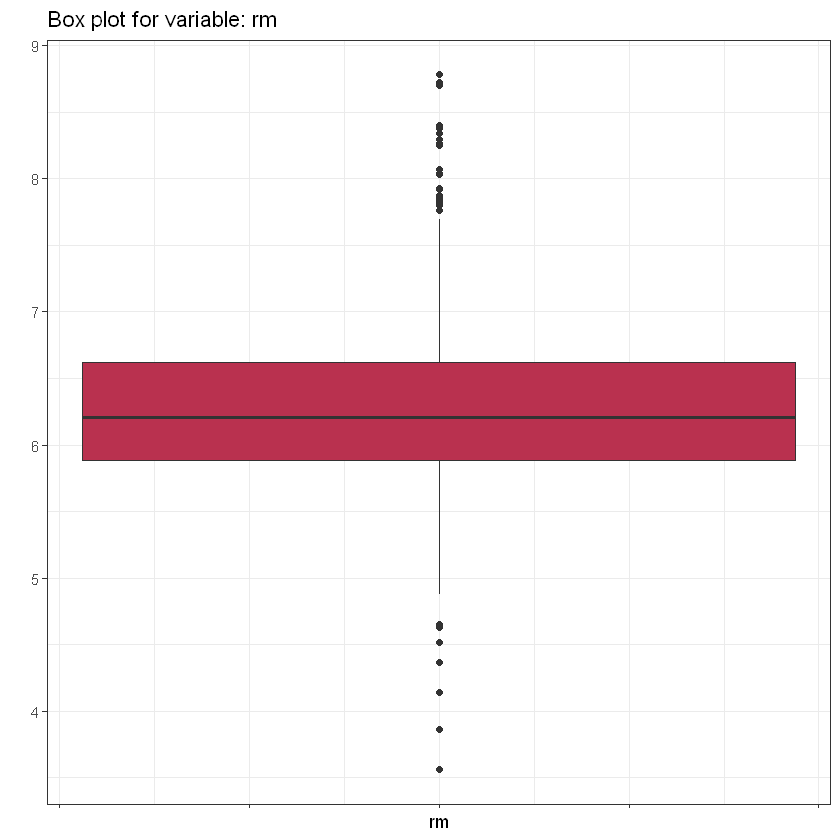

In [28]:
# Criando um boxplot para a variável especificada.

boxPlot(col, data = data)

O boxplot nos indica que há outliers na parte superior e inferior dos dados, mas a simetria parece se manter no gráfico.

Vamos confirmar essa teoria utilizando os coeficientes de **Assimetria** e **Curtose** mais uma vez.

In [29]:
# Determinando o coeficiente de assimetria para o conjunto de dados rm.

sk <- skewness(data$rm)

# Imprimindo o valor do índice.

paste('SK:', sk)

[1] "SK: 0.401222328753187"

O conjunto de dados da variável **rm** apresenta uma assimetria positiva, ou seja, a cauda do lado direito é maior do que a do lado esquerdo.

In [30]:
# Determinando o coeficiente de curtose para o conjunto de dados rm.

ck <- kurtosis(data$rm)

# Imprimindo o valor do índice.

paste('CK:', ck)

[1] "CK: 1.8418324129018"

Como o coeficiente de **Curtose** para o conjunto de dados da variável **rm** é maior do que 0, podemos afirmar que este conjunto de dados possui uma calda mais pesada do que a normal.

#### **3.3.8 Variável age**

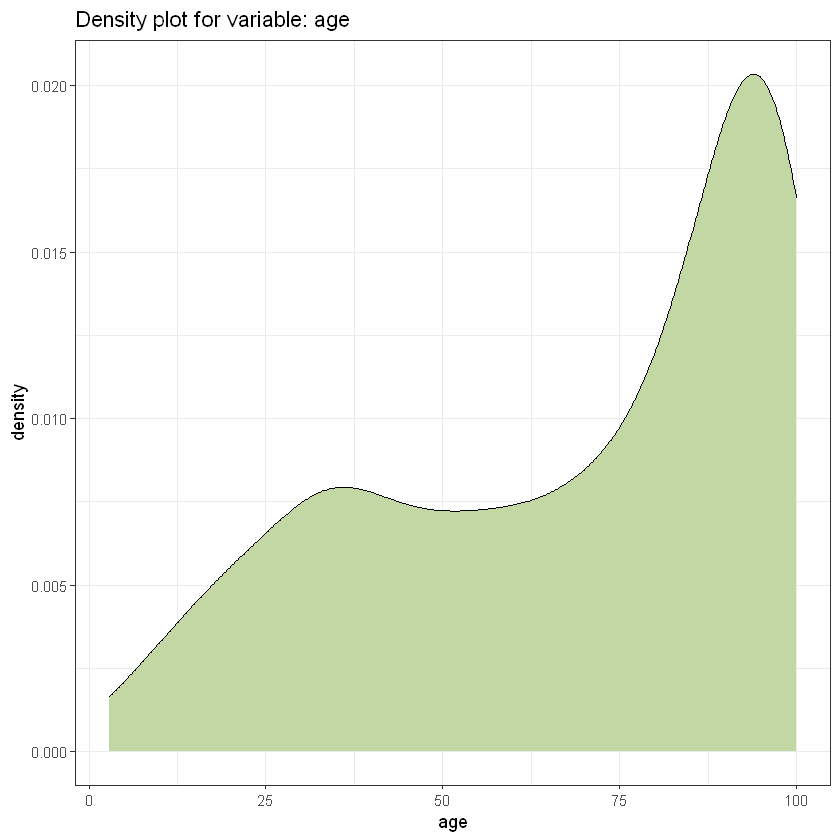

In [31]:
# Definindo o nome da variável a ser analisada.

col <- 'age'

# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data = data)

O gráfico nos demonstra que a proporção de unidades ocupadas pelos proprietários construídas antes de 1940 tem a maior densidade entre 85 e 95 anos.

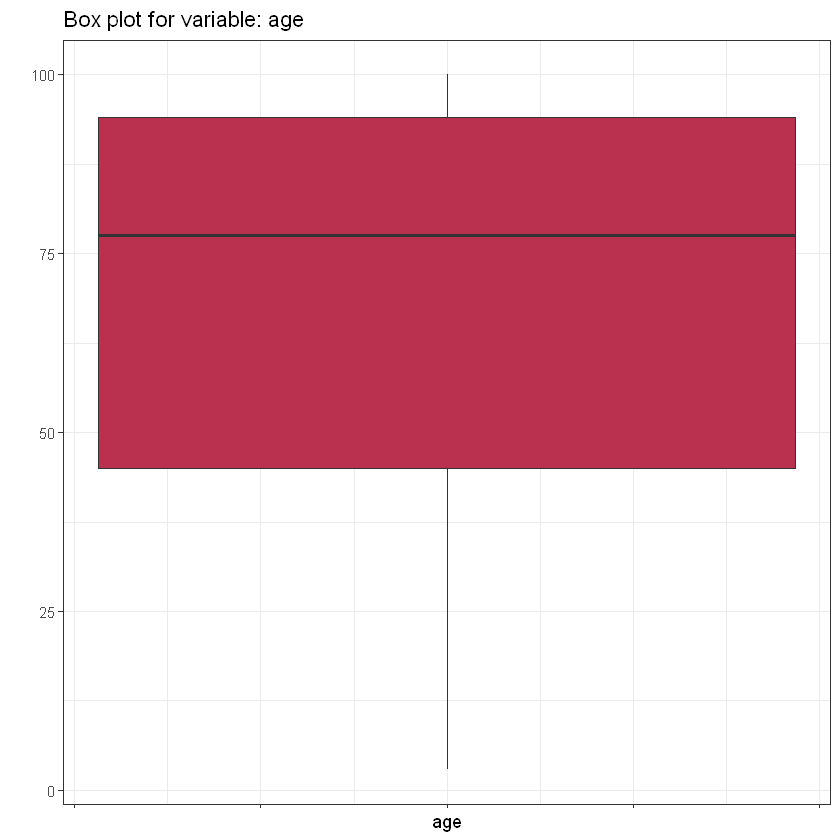

In [32]:
# Criando um boxplot para a variável especificada.

boxPlot(col, data = data)

O boxplot nos indica que o conjunto de dados da variável **age** possui uma assimetria à esquerda.

#### **3.3.9 Variável dis**

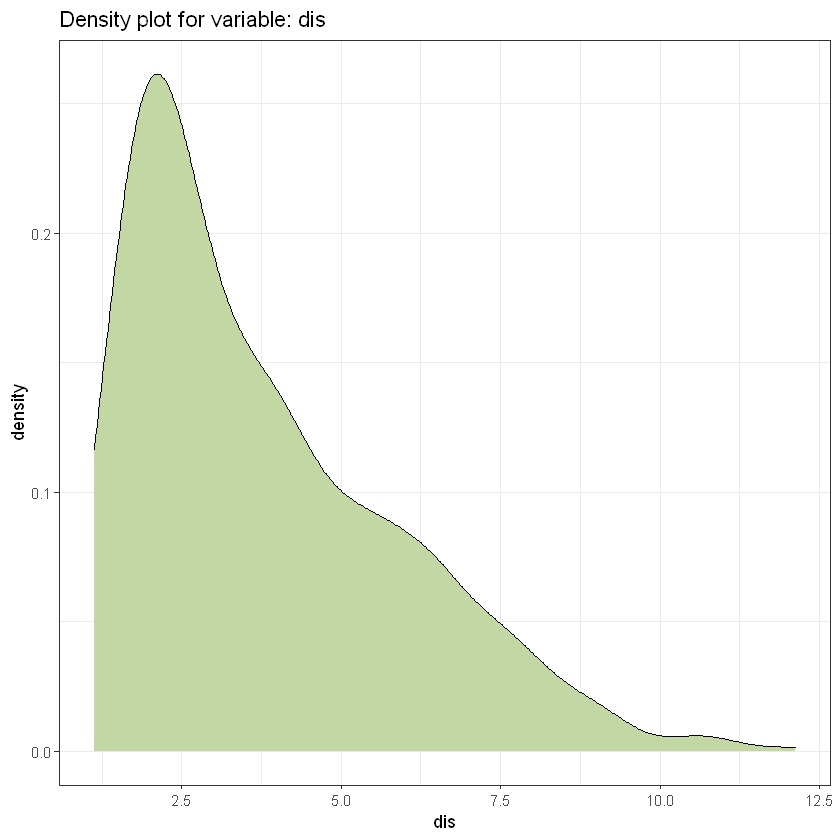

In [33]:
# Definindo o nome da variável a ser analisada.

col <- 'dis'

# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data = data)

O gráfico nos demonstra que a distância ponderada de cinco centros de emprego em Boston tem a maior densidade em torno do valor 2.5.

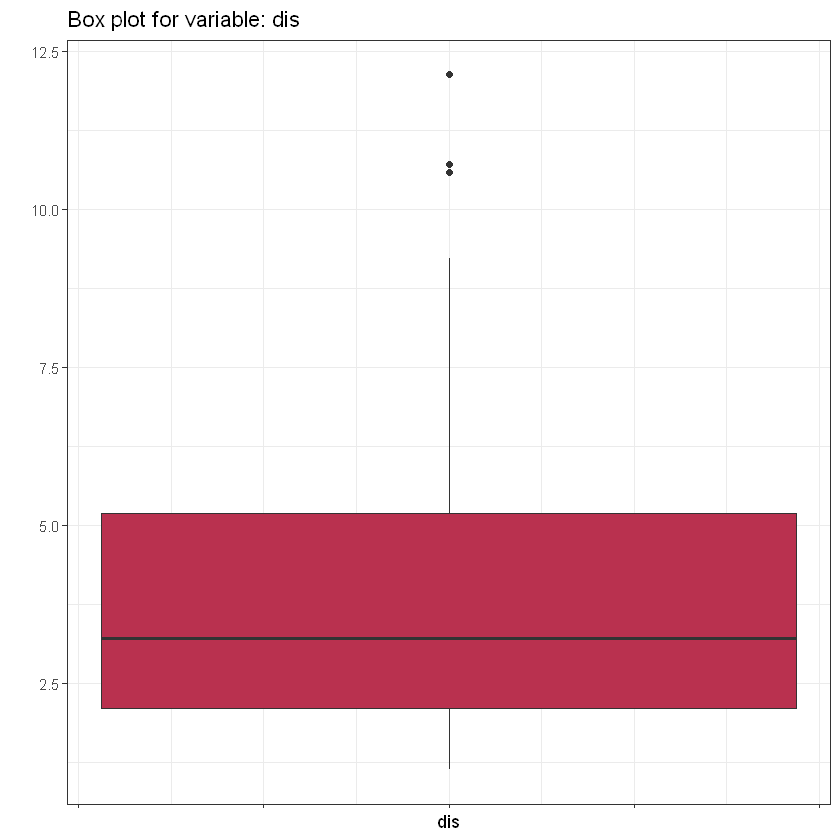

In [34]:
# Criando um boxplot para a variável especificada.

boxPlot(col, data = data)

O boxplot nos indica que o conjunto de dados da variável **dis** possui uma assimetria à direita.

#### **3.3.10 Variável rad**

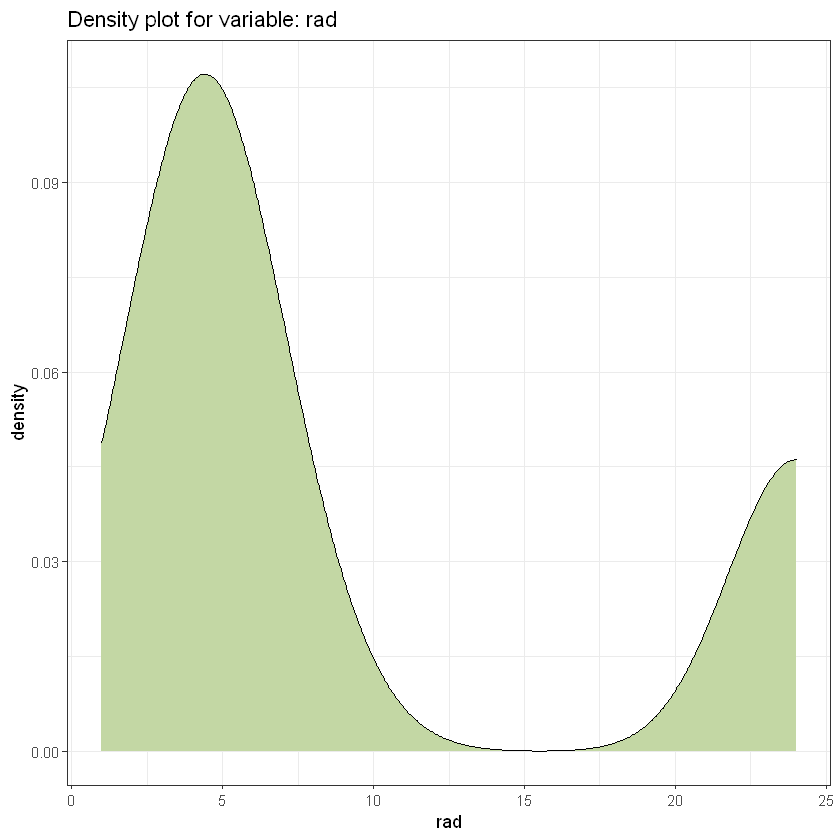

In [35]:
# Definindo o nome da variável a ser analisada.

col <- 'rad'

# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data = data)

O gráfico nos demonstra que o índice de acessibilidade às rodovias radiais possui dois valores aproximadamente mais frequentes, 5 e 24.

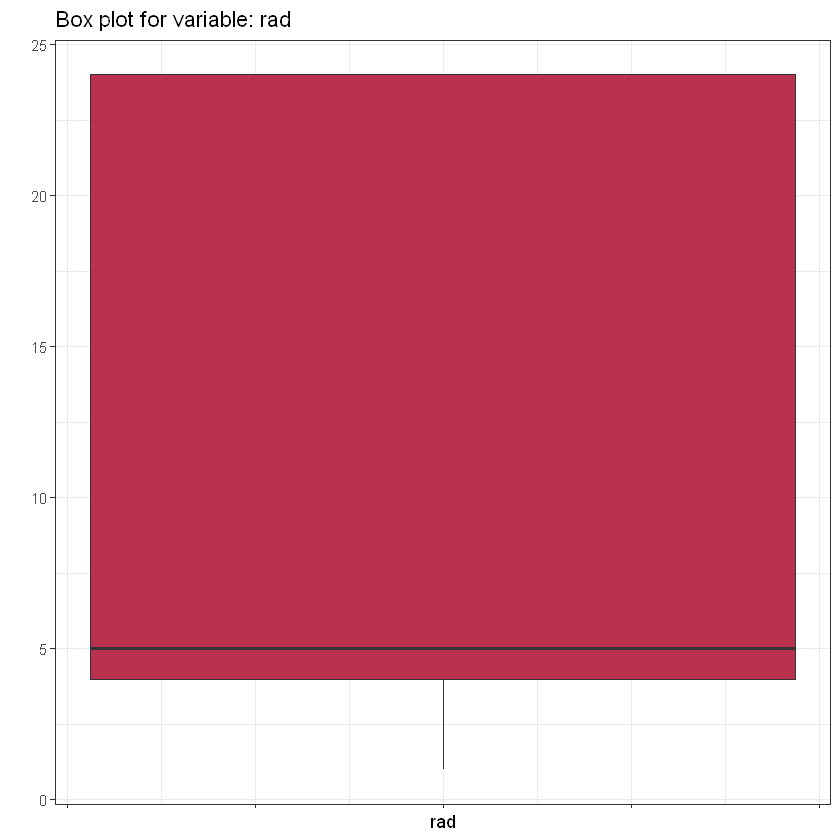

In [36]:
# Criando um boxplot para a variável especificada.

boxPlot(col, data = data)

O boxplot nos indica que o conjunto de dados da variável **rad** possui uma assimetria à direita.

#### **3.3.11 Variável tax**

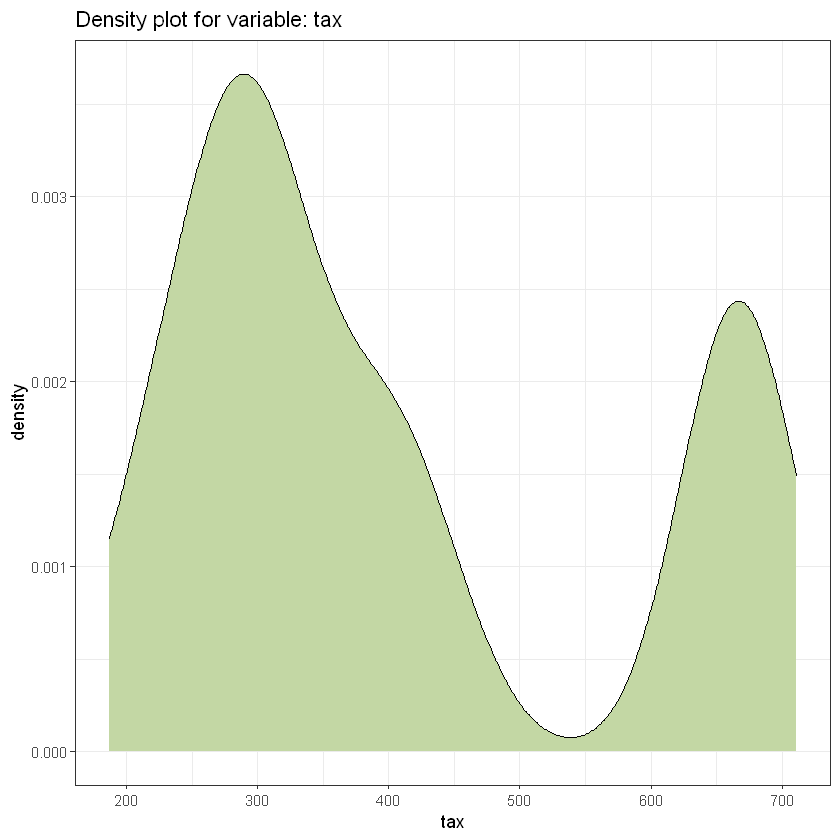

In [37]:
# Definindo o nome da variável a ser analisada.

col <- 'tax'

# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data = data)

O gráfico nos demonstra que  a taxa de imposto sobre a propriedade possui aproximadamente dois valores mais frequentes, 300 e 660.

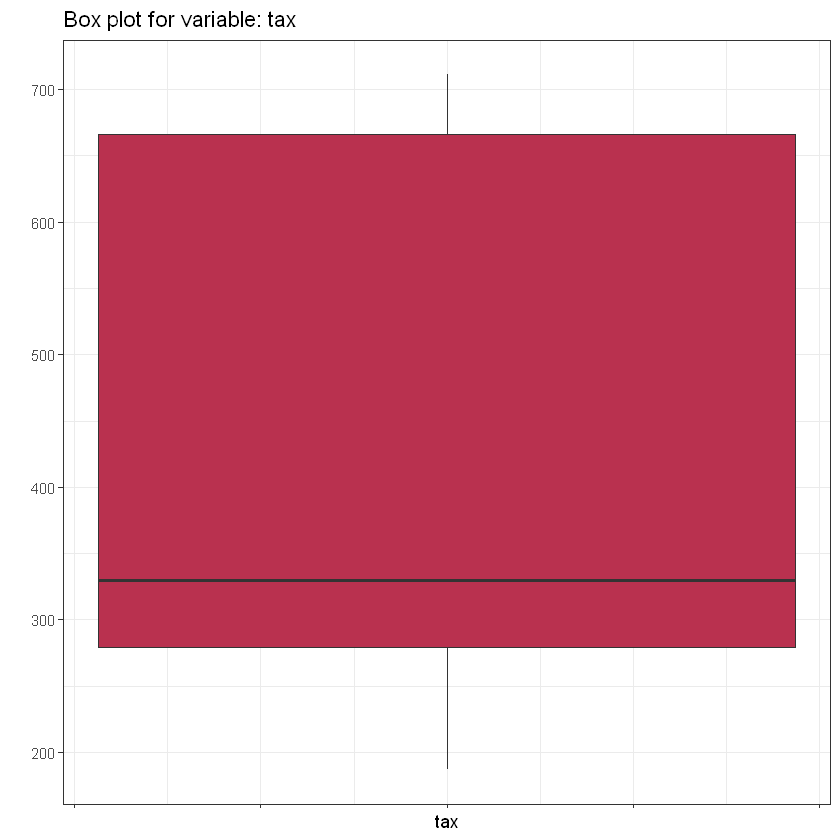

In [38]:
# Criando um boxplot para a variável especificada.

boxPlot(col, data = data)

O boxplot nos indica que o conjunto de dados da variável **tax** possui uma assimetria à direita.

#### **3.3.12 Variável ptratio**

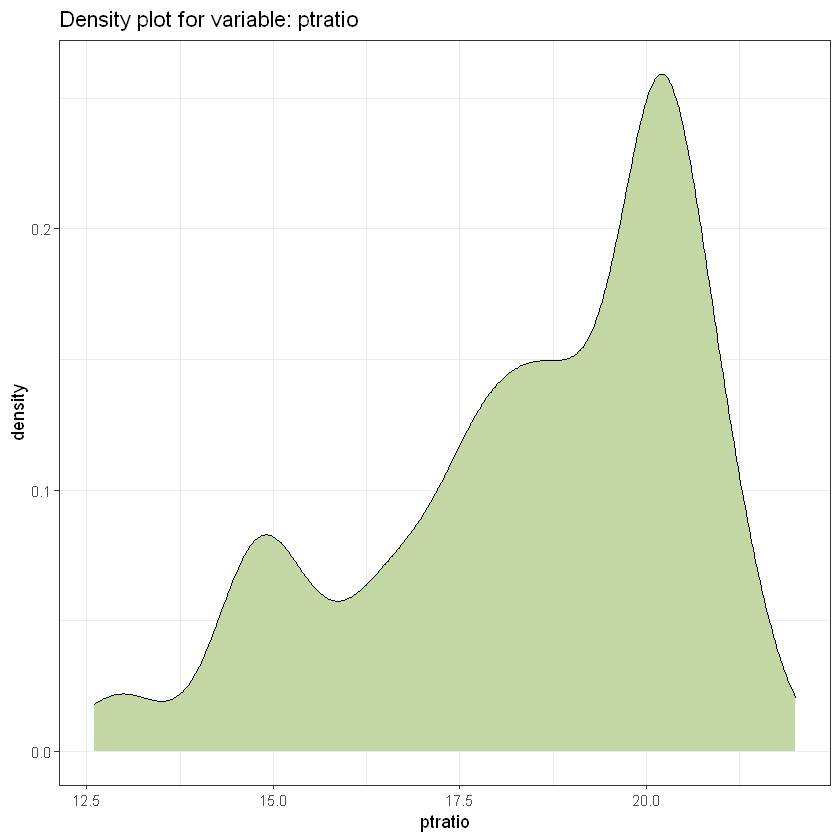

In [39]:
# Definindo o nome da variável a ser analisada.

col <- 'ptratio'

# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data = data)

O gráfico nos demonstra que a proporção aluno-professor por cidade tem maior densidade no valor 20.

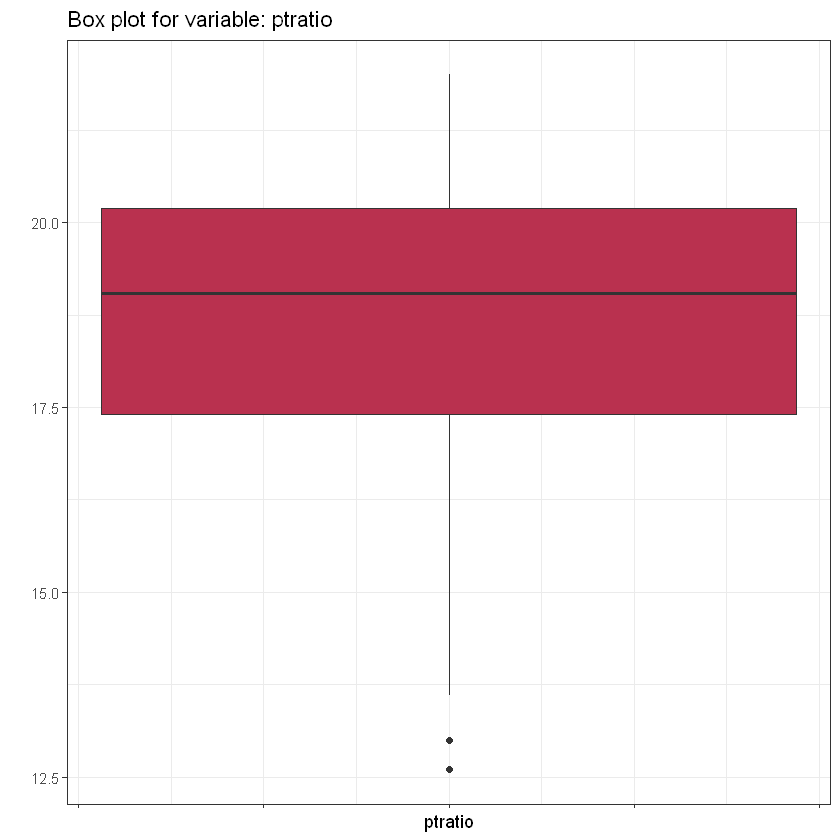

In [40]:
# Criando um boxplot para a variável especificada.

boxPlot(col, data = data)

O boxplot nos indica que o conjunto de dados da variável **ptratio** possui uma assimetria à esquerda.

#### **3.3.13 Variável black**

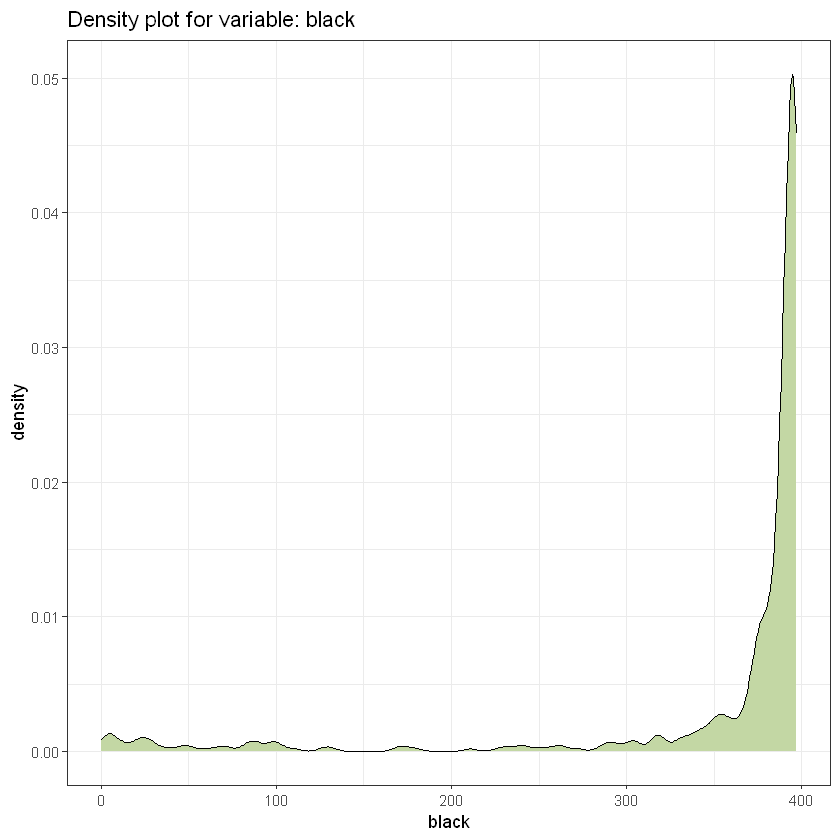

In [41]:
# Definindo o nome da variável a ser analisada.

col <- 'black'

# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data = data)

O gráfico nos demonstra que  a proporção de negros apresenta a maior densidade em torno do valor 400.

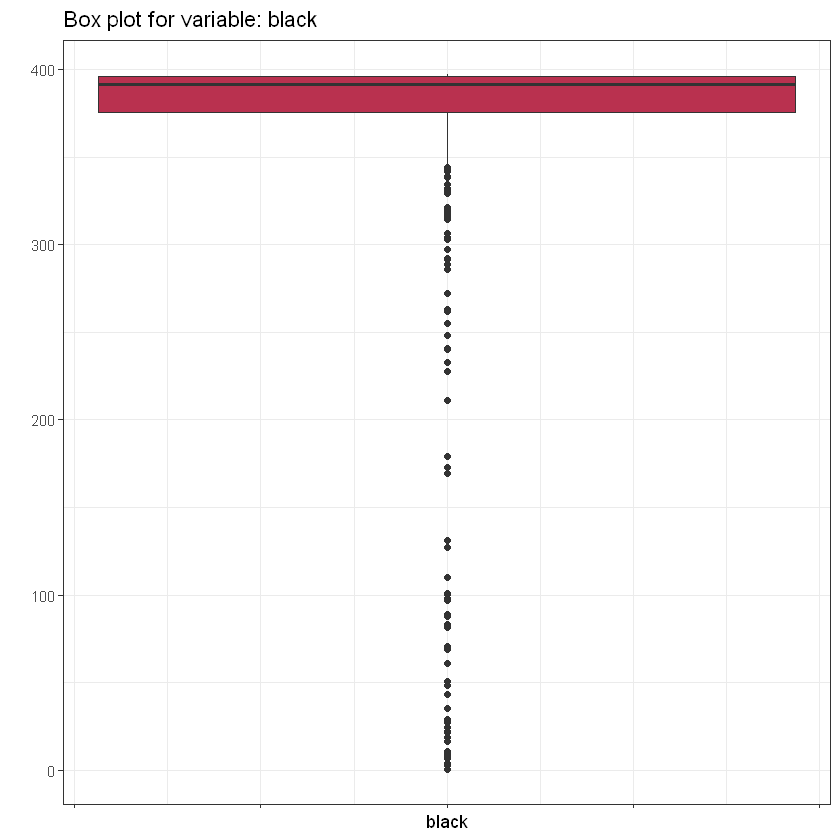

In [42]:
# Criando um boxplot para a variável especificada.

boxPlot(col, data = data)

O boxplot nos indica que o conjunto de dados da variável **black** possui uma assimetria à esquerda com muitos outliers inferiores.

#### **3.3.14 Variável lstat**

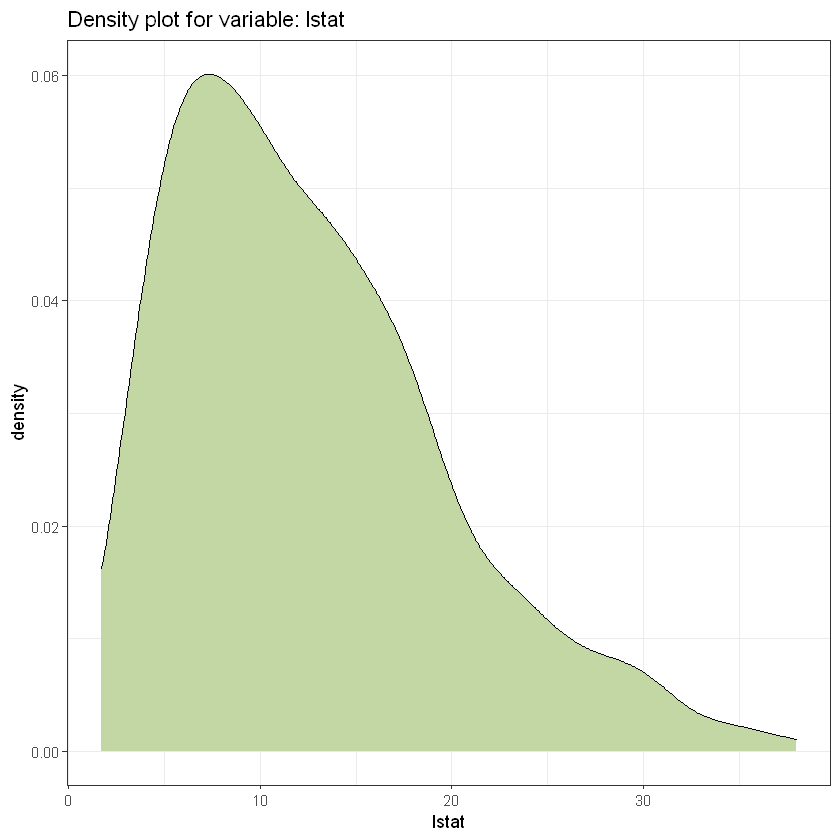

In [43]:
# Definindo o nome da variável a ser analisada.

col <- 'lstat'

# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data = data)

O gráfico nos demonstra que a menor porcentagem do status da população tem maior densidade em torno do valor 10.

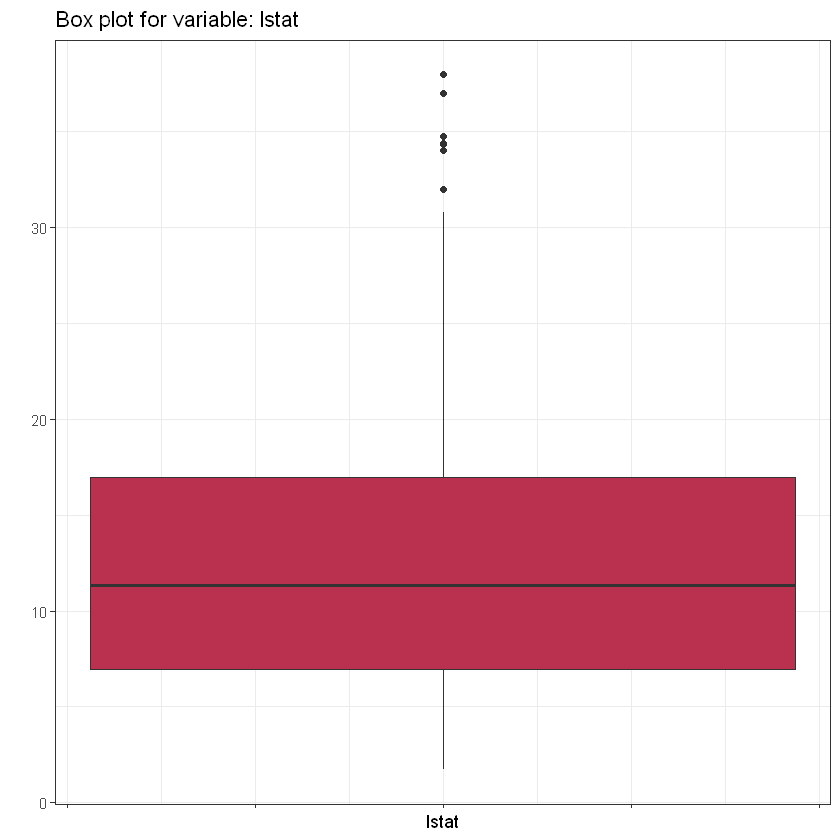

In [44]:
# Criando um boxplot para a variável especificada.

boxPlot(col, data = data)

O boxplot nos indica que o conjunto de dados da variável **lstat** possui uma assimetria à direita com muitos outliers superiores.

### **3.4 Teste de hipóteses entre as variáveis medv e chas**

Por curiosidade, vamos análisar se existe uma diferença estatisticamente significativa entre os preços de casas que limitam ou não o rio Charles. Para isto, vamos criar um gráfico para visualizar a distribuição dos preços das casas em função das classes da variável **chas**.

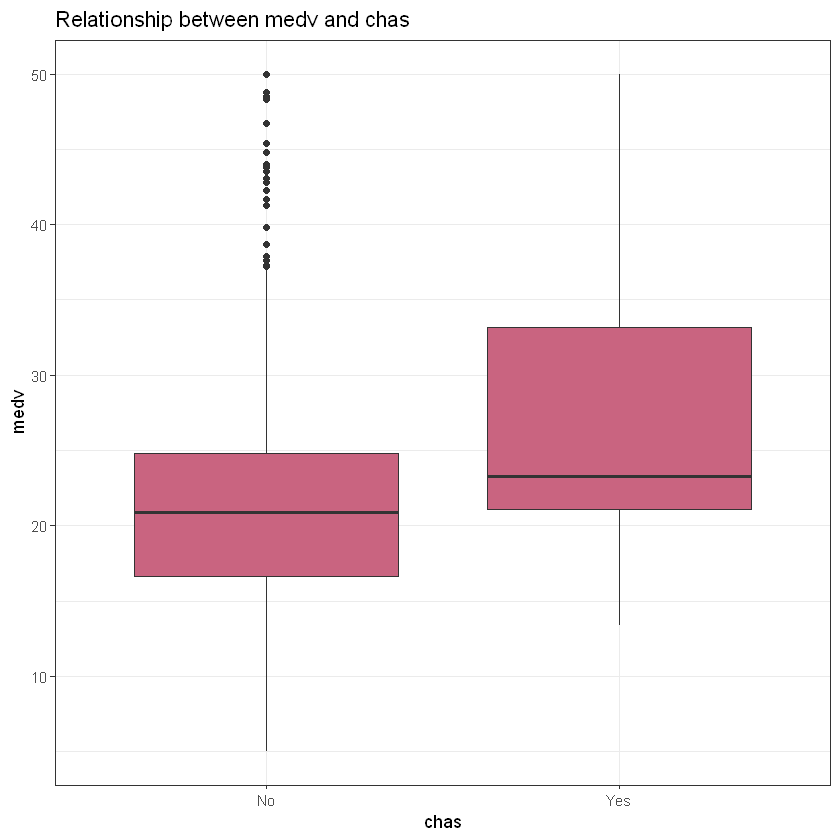

In [45]:
# Análisando a distribuição dos preços das casas a partir da variável chas.

ggplot() +
  geom_boxplot(aes(x = factor(data[, 'chas'], labels = c('No', 'Yes')), y = data[, 'medv'] ), fill = "#C96480") +
  labs(title = 'Relationship between medv and chas') +
  xlab('chas') +
  ylab('medv') +
  theme_bw() 

Interessante, parece que as casas que não limitam o rio Charles apresentam preços medianos menores do que as casas que o fazem.

Mas, vamos aplicar um **teste T** para verificar se essa interpretação está efetivamente correta.

In [46]:
## Criando um teste T para verificar se a diferença das médias dos preços das casas (medv) agrupados por chas apresentam uma diferença na média estatisticamente significativa.

# Agrupando grupos dos valores das casas segundo a variável chas.

chasY <- data[data$chas == 1, 'medv'] 

chasN <- data[data$chas == 0, 'medv'] 

Definiremos nossas hipóteses da seguinte maneira:

| Teste de hipótese                                                                           |
|:--------------------------------------------------------------------------------------------|
|**H0:** As médias dos preços das casas que limitam ou não o rio Charles River são iguais.    |
|**Ha:** As médias dos preços das casas que limitam ou não o rio Charles River são diferentes.|


In [47]:
# Aplicando o teste T.

t.test(chasY, chasN)


	Welch Two Sample t-test

data:  chasY and chasN
t = 3.1133, df = 36.876, p-value = 0.003567
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  2.215483 10.476831
sample estimates:
mean of x mean of y 
 28.44000  22.09384 


Há evidências suficientes, com um nível de significância de 5%, para rejeitar a hipótese nula de que as médias dos preços das casas que limitam ou não o rio Charles River são iguais.

Concluímos que *há uma diferença estatisticamente* significativa entre os preços das casas que limitam e as que não limitam o rio charles. 

## **4 Data Munging**


Nesta etapa vamos escalar os valores das variáveis do dataset entre 0 e 1.

In [48]:
# Definindo método de pré-processamento.

params <- preProcess(data, method = 'range')

# Transformando os dados.

data <- predict(params, data)

# Visualizando as primeiras linhas do dataset.

head(data)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.0000000000,0.18,0.06781525,0,0.3148148,0.5775053,0.6416066,0.2692031,0.00000000,0.20801527,0.2872340,1.0000000,0.08967991,0.4222222
0.0002359225,0.00,0.24230205,0,0.1728395,0.5479977,0.7826982,0.3489620,0.04347826,0.10496183,0.5531915,1.0000000,0.20447020,0.3688889
0.0002356977,0.00,0.24230205,0,0.1728395,0.6943859,0.5993821,0.3489620,0.04347826,0.10496183,0.5531915,0.9897373,0.06346578,0.6600000
0.0002927957,0.00,0.06304985,0,0.1502058,0.6585553,0.4418126,0.4485446,0.08695652,0.06679389,0.6489362,0.9942761,0.03338852,0.6311111
0.0007050701,0.00,0.06304985,0,0.1502058,0.6871048,0.5283213,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775,0.6933333
0.0002644715,0.00,0.06304985,0,0.1502058,0.5497222,0.5746653,0.4485446,0.08695652,0.06679389,0.6489362,0.9929901,0.09602649,0.5266667


## **5. Modelagem Preditiva**

### **5.1 Importando bibliotecas necessárias**

In [ ]:
# Caso não possua uma das bibliotecas importadas abaixo, a instale com um dos comandos a seguir:

install.packages(c(
    'e1071',
    'neuralnet',
    'xgboost',
    'randomForest',
    'pROC',
    'C50',
    'fastAdaboost'
))

In [ ]:
# Importando bibliotecas.

library(e1071)
library(neuralnet)
library(xgboost)
library(randomForest)
library(pROC)
library(C50)
library(fastAdaboost)

### **5.2 Criando dados de treino e de teste**

Para iniciar a modelagem preditiva, iremos criar os dados de treino e de teste.

In [51]:
# Definindo um seed.

set.seed(100)

# Criando as partições com dados de treino e de teste.

inTrain <- createDataPartition(data$medv, p = .80, list = F)

# Segmentando dados de treino e de teste por partição.

train <- data[inTrain, ]
test  <- data[-inTrain, ]

### **5.3 Avaliando a importância das variáveis com o algoritmo Random Forest**

In [52]:
# Criando o dataframe para salvar os resultados dos modelos.

featuresRF <- data.frame()

# Definindo o número de nós e árvores a serem combinados para a criação de diferentes modelos.

nTrees <- 1:100
nNodes <- 1:100

# Define o número total de modelos a serem criados.

total <- length(nTrees) * length(nNodes)

# Define uma varíavel auxiliar para permitir o acompanhamento do progresso na avaliação dos modelos criados.

count <- 0

for(t in nTrees) {
    
  for(n in nNodes) {
    
    # Define um seed para permitir que os mesmos resultados dos experimentos sejam reproduzíveis.
    
    set.seed(100)
    
    # Cria o modelo Random Forest a ser avaliado.

    model <- randomForest(medv ~ .,
                          data       = train, 
                          ntree      = t, 
                          nodesize   = n, 
                          importance = T)

    # Realizando as predições com o modelo criado.
    
    pred <- predict(model, train[!colnames(train) %in% 'medv'])

    # Armazena os parâmetros utilizados para criação do modelo e o valor da métrica R2 obtida no dataframe.

    featuresRF <- rbind(featuresRF, data.frame(
        nodes    = n, 
        nTree    = t, 
        r2       = R2(pred, train$medv)
    ))
    
    # Incrementa o número de modelos avaliados.

    count <- count + 1

    # Imprime a porcentagem de progresso do treinamento e o melhor score R2 já alcançado.

    print(paste(100 * count / total, '%, best R2: ', max(featuresRF$r2)))
  }
}

Salvaremos o dataframe gerado em um arquivo CSV e imprimiremos o registro do modelo que apresentou o maior valor para a métrica R2.

In [53]:
# Salvando dataframe em um arquivo .csv.

write.csv(featuresRF, 'featuresRF.csv')

# Imprimindo registro do modelo que alcançou a maior acurácia.

bestRF <- featuresRF[featuresRF$r2 == max(featuresRF$r2),]

bestRF 

,nodes,nTree,r2
9001,1,91,0.9862457


Recriaremos este modelo e imprimiremos suas estatísticas.

In [54]:
# Criando modelo.

set.seed(100)

model <- randomForest(medv ~ .,
                      data       = train, 
                      ntree      = bestRF[, 'nTree'], 
                      nodesize   = bestRF[, 'nodes'], 
                      importance = T)
                      
# Imprimindo o modelo.

model


Call:
 randomForest(formula = medv ~ ., data = train, ntree = bestRF[,      "nTree"], nodesize = bestRF[, "nodes"], importance = T) 
               Type of random forest: regression
                     Number of trees: 91
No. of variables tried at each split: 4

          Mean of squared residuals: 0.005352482
                    % Var explained: 87.19

Agora podemos plotar o modelo em um gráfico e verificar o nível de importância das variáveis do dataset para prever a variável alvo.

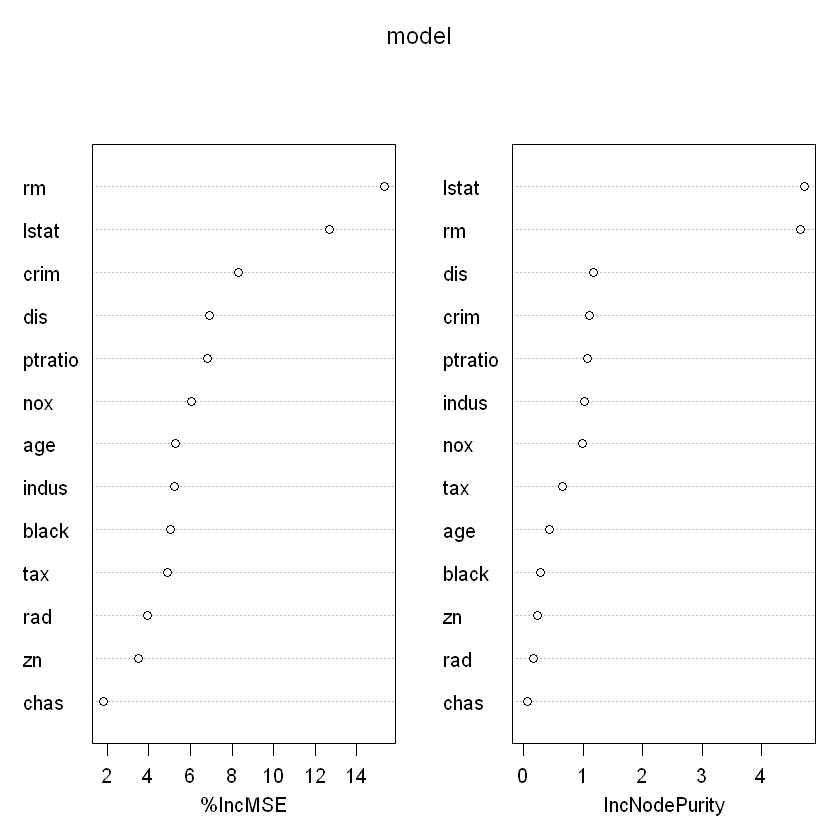

In [55]:
# Plotando gráfico para visualizar o nível de importância de cada variável no processo de predição da variável alvo.

v <- as.data.frame(varImpPlot(model))

Também podemos mensurar numericamente o quanto cada variável auxilia no processo de predição da variável alvo.

In [56]:
# Captura em ordem decrescente de nível de importância o nome das variáveis.

names <- rownames(v[order(v[, '%IncMSE'], decreasing = T),])

# Imprime o resultado.

v[order(v[, '%IncMSE'], decreasing = T),]

,%IncMSE,IncNodePurity
rm,15.347528,4.65412868
lstat,12.692737,4.72855512
crim,8.311760,1.10092431
dis,6.891099,1.17807840
ptratio,6.812864,1.06997349
nox,6.062349,0.99378478
age,5.259128,0.43908018
indus,5.213971,1.02032114
black,5.025957,0.28615954
tax,4.877453,0.64410508


### **5.4 Feature Selection**

Nesta etapa, vamos selecionar as melhores variáveis para a criação dos modelos preditivos.

Segundo o modelo Random Forest criado anteriormente, as variáveis **zn**, **rad** e **chas** foram as que apresentaram o menor índice de importância tanto para a métrica ***%IncMSE*** quanto para ***IncNodePurity*** como ilustrado no gráfico. 

**zn** e **rad** possuem forte correlações com outras variáveis preditoras o que poderá levar a problemas de *overfitting*.

Já **chas** possuí uma correlação muito fraca com todas as variáveis do dataset.

Por estes motivos, iremos desconsiderar estas 3 variáveis preditoras no processo de criação de modelos preditivos.



In [57]:
# Definindo fórmula a ser utilizada pelos modelos preditivos.

f <- medv ~ . -zn -rad - chas

In [58]:
# Definindo um vetor lógico indicando quais colunas devem ser ignoradas pelos modelos preditivos.

ignoreCols <- colnames(train) %in% c('zn', 'rad', 'chas', 'medv')

### **5.5 Criando modelos**

Nesta fase iremos criar modelos baseados em diferentes algoritmos e selecionaremos aquele que obter o maior score para a métrica **R2**. 

#### **5.5.1 Modelo Random Forest**

In [59]:
# Definindo um Seed.

set.seed(100)

# Criando modelo Random Forest com as melhores configurações de estrutura encontradas na avaliação de importância das variáveis.

model_rf <- randomForest(f,
                      data       = train, 
                      ntree      = bestRF[, 'nTree'], 
                      nodesize   = bestRF[, 'nodes'])
                      
# Imprimindo o modelo.

model_rf


Call:
 randomForest(formula = f, data = train, ntree = bestRF[, "nTree"],      nodesize = bestRF[, "nodes"]) 
               Type of random forest: regression
                     Number of trees: 91
No. of variables tried at each split: 3

          Mean of squared residuals: 0.005481058
                    % Var explained: 86.88

In [60]:
# Realizando previsões com o modelo baseado no algoritmo Random Forest.

pred <- predict(model_rf, test[!colnames(test) %in% 'medv'])

In [61]:
# Calculando a métrica R2 gerada ao se utilizar o modelo.

r2_rf <- R2(pred, test$medv)

# Imprimindo o valor da métrica R2.

r2_rf

[1] 0.8859827

#### **5.5.2 Modelo Xgboost**

In [62]:
# Criando modelo XGboost.

  model_xgboost <- xgboost(
      data      = as.matrix(train[, ignoreCols]), # Define as variáveis preditoras.
      label     = as.matrix(train$medv),          # Define a variável target.
      max.depth = 50,                             # Defie o tamanho máximo da árvore.
      eta       = 1,                              # Define a taxa de aprendizado do modelo.
      nthread   = 4,                              # Define o número de threads que devem ser usadas. Quanto maior for esse número, mais rápido será o treinamento.
      nrounds   = 15,                             # Define o número de iterações.
      verbose   = T,                              # Exibe a queda da taxa de erro durante o treinamento.
      eval_metric = 'rmse'                        # Define a métrica de avaliação com a qual o modelo deve ser avaliado.
)

[1]	train-rmse:0.029478 
[2]	train-rmse:0.007020 
[3]	train-rmse:0.002918 
[4]	train-rmse:0.001503 
[5]	train-rmse:0.001006 
[6]	train-rmse:0.000834 
[7]	train-rmse:0.000797 
[8]	train-rmse:0.000794 
[9]	train-rmse:0.000794 
[10]	train-rmse:0.000794 
[11]	train-rmse:0.000794 
[12]	train-rmse:0.000794 
[13]	train-rmse:0.000794 
[14]	train-rmse:0.000794 
[15]	train-rmse:0.000794 


In [63]:
# Realizando as previsões como o modelo baseado no algoritmo XGboost.

pred <- predict(model_xgboost, as.matrix(test[, ignoreCols]))

In [64]:
# Calculando a métrica R2 gerada ao se utilizar o modelo.

r2_xgboost <- R2(pred, test$medv)

# Imprimindo o valor da métrica R2.

r2_xgboost

[1] 0.9993089

#### **5.5.3 Modelo neuralnet**

In [ ]:
# Criando diversos modelos de rede neural com diferentes arquiteturas e avaliando seu nível de precisão para a avaliação dos dados de teste.

# Criando um data.frame para armazenar os parâmetros utilizados em cada modelo criado.

results <- data.frame()

# Definindo o número de neurônios que devem ser utilizados em cada arquitetura de rede neural a ser criada.

neurons    <- 2:100

# Definindo diferentes taxas de aprendizagem para serem aplicadas a cada arquitetura de rede neural.

thresholds <- c(0.008, 0.009, 0.01)

# Define o número total de modelos a ser criado.

total <- length(neurons) * length(thresholds)

# Define um variável para contabilizar o número de modelos já criado.

count <- 0

# Definindo um loop para percorrer o número de neurônios que cada modelo criado deve possuir.

for(n in neurons) {
  
  # Definindo um loop para aplicar diferentes taxas de aprendizagem a cada arquitetura de rede neural criada.

  for(r in thresholds) {
    
    # Define um seed para permitir que os resultados gerados possam ser reproduzíveis.

    set.seed(100)
    
    # Cria o modelo baseado no algoritmo neuralnet.

    nn <- neuralnet(f, data = train, hidden = c(n), linear.output = T, threshold = r)
    
    # Realizando as previsões para os dados de teste.

    pre <- predict(nn, test)

    # Calculando o valor da métrica R2.

    r2 <- R2(pre, test$medv)
    
    # Armazenando os resultados no dataset.

    results <- rbind(results, data.frame(n = n, threshold = r, r2 = r2))
    
    # Incrementando o número de modelos criados.

    count <- count + 1

    # Imprimindo uma mensagem com o progresso dos treinamento dos modelos.

    print(paste(100 * count / total, '%, best R2: ', max(results$r2)))
  }
}


Salvaremos o dataframe gerado em um arquivo CSV e imprimiremos o registro do modelo que apresentou o maior valor para a métrica R2.

In [66]:
# Salvando dataframe em um arquivo .csv.

write.csv(featuresRF, 'featuresNN.csv')

# Imprimindo registro do modelo que alcançou o maior score para a métrica R2.

bestNN <- results[results$r2 == max(results$r2),]

bestNN

,n,threshold,r2
60,21,0.01,0.927713


#### **5.5.4 Selecionando o melhor modelo criado**

Determinaremos qual modelo teve o melhor desempenho para o conjunto de dados de teste a partir do score da métrica **R2** (*R-squared*) gerados por cada um.

In [67]:
# Criando um vetor com os scores para a métrica R2 obtidos por cada modelo.

r2Models <- c(
    randomForest = r2_rf,
    xgboost      = r2_xgboost,
    neuralnet    = bestNN$r2
)

# Determinando o modelo com o maior score R2.

head(sort(r2Models, decreasing = T), 1)

xgboost 
0.9993089

Finalizamos esta análise concluindo que o algoritmo **XGboost** foi aquele que obteve a melhor performance para a métrica **R2** em relação aos demais algoritmos implementados com um score de:

* **XGboost:** 0.999308948695104

## **Entre em contato comigo!**

Caso tenha alguma dúvida, sugestão ou apenas queira trocar uma ideia sobre este projeto, não hesite em entrar em contato comigo!

<table align='center'>
    <tr style=" background-color: rgba(0,0,0,0);">
        <td>
            <img src="https://image.flaticon.com/icons/svg/732/732026.svg" alt="Email" height="42" width="42">
        </td>
        <td>
            <p>
                <a href="mailto:franklinfs390@gmail.com">E-mail</href>
            </p>
        </td>
    <td>
            <img src="https://image.flaticon.com/icons/svg/254/254394.svg" alt="Linkedin" height="42" width="42">
    </td>
    <td>
        <p>
            <a href="https://www.linkedin.com/in/franklinfs390/">Linkedin</href>
        </p>
    </td>
    <td>
        <img src="https://image.flaticon.com/icons/svg/2111/2111432.svg" alt="Github" height="42" width="42">
    </td>
    <td>
        <p>
            <a href="https://github.com/franklin390">Github</href>
        </p>
    </td>
  </tr>
</table>
